# FAKE-NEWS_DETECTION

Leveraging the power of Natural Language Processing (NLP), we can develop robust algorithms to discern authentic news from fabricated ones,
aiding in the crucial task of combating misinformation.

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
import nltk
from nltk import word_tokenize
import string
import re

In [80]:
df=pd.read_csv("F:/NATAURAL LANUAGE PROCESSING/DATA/news.csv")

In [81]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [82]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [83]:
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [84]:
df.sample(10)

,Unnamed: 0,title,text,label
3270,5807,Top EU Official Disputes That Trump Could Upen...,"November 11, 2016 Top EU Official Disputes Tha...",FAKE
212,2281,Justices Kennedy and Scalia and their divide o...,Justices Anthony M. Kennedy and Antonin Scalia...,REAL
701,7789,Understanding Propaganda - The Art Of Distract...,5 \nMost American spend over 9 hours a day usi...,FAKE
1422,23,House OKs bill blocking Planned Parenthood fun...,The House voted Friday to block federal fundin...,REAL
1480,3046,Why do people on the other side seem so unreas...,George W. Bush famously described himself as “...,REAL
2590,5358,TOP DEMOCRATIC DONOR: BLACKS ARE “SERIOUSLY F*...,Home › POLITICS › TOP DEMOCRATIC DONOR: BLACKS...,FAKE
100,4294,How Ted Cruz Became Ted Cruz,"In 2008, in the high-profile Supreme Court gun...",REAL
3547,3810,Obama's last State of the Union address in thr...,As a long time observer of the political proce...,REAL
2659,358,Dozens of intelligence analysts reportedly cla...,Dozens of intelligence analysts working at the...,REAL
974,7223,The Sex Scandal That Could Change The Election,We Are Change \nWith only days away from the m...,FAKE


In [85]:
df.shape

(6335, 4)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [87]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [88]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [89]:
df.duplicated().sum()

0

# DATA CLEANING

In [90]:
df.duplicated().sum()

0

In [91]:
df1=df.drop_duplicates()

In [92]:
df1

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [93]:
df1=df1.reset_index()

In [94]:
df1

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...,...
6330,6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [95]:
df1.isna().sum()

index         0
Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [96]:
df1.drop(['index','Unnamed: 0','title'],axis=1,inplace=True)

In [97]:
df1

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
...,...,...
6330,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [98]:
df['title'].value_counts()

title
OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
                                                                                                     ..
This Year’s Mammogram Month Launched With Devastating Report On Harms, Lack Of Effectiveness          1
Trump Reveals American Muslim Solution                                                                1
Fox News Gets Destroyed While Trying To Blame Hillary Clinton For GOP Email Scandal                   1
Jeh Johnson calls for increased vigilance after Mall of Am

<Axes: xlabel='label', ylabel='count'>

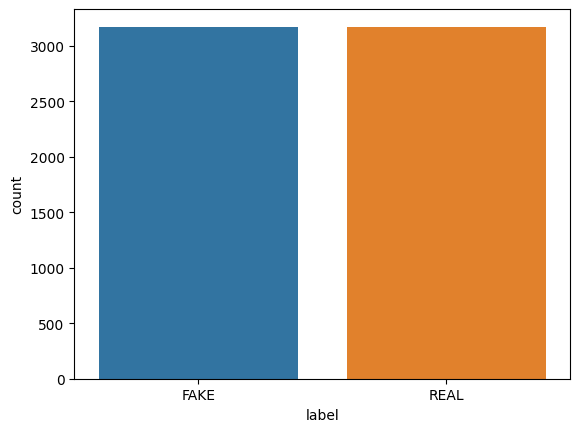

In [99]:
sns.countplot(df,x='label')

In [101]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [102]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [103]:
Review=df1['text']
Review

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [104]:
tokens=[]

for i in Review:
    each_word=word_tokenize(i)
    tokens.extend(each_word)

tokens

['Daniel',
 'Greenfield',
 ',',
 'a',
 'Shillman',
 'Journalism',
 'Fellow',
 'at',
 'the',
 'Freedom',
 'Center',
 ',',
 'is',
 'a',
 'New',
 'York',
 'writer',
 'focusing',
 'on',
 'radical',
 'Islam',
 '.',
 'In',
 'the',
 'final',
 'stretch',
 'of',
 'the',
 'election',
 ',',
 'Hillary',
 'Rodham',
 'Clinton',
 'has',
 'gone',
 'to',
 'war',
 'with',
 'the',
 'FBI',
 '.',
 'The',
 'word',
 '“',
 'unprecedented',
 '”',
 'has',
 'been',
 'thrown',
 'around',
 'so',
 'often',
 'this',
 'election',
 'that',
 'it',
 'ought',
 'to',
 'be',
 'retired',
 '.',
 'But',
 'it',
 '’',
 's',
 'still',
 'unprecedented',
 'for',
 'the',
 'nominee',
 'of',
 'a',
 'major',
 'political',
 'party',
 'to',
 'go',
 'war',
 'with',
 'the',
 'FBI',
 '.',
 'But',
 'that',
 '’',
 's',
 'exactly',
 'what',
 'Hillary',
 'and',
 'her',
 'people',
 'have',
 'done',
 '.',
 'Coma',
 'patients',
 'just',
 'waking',
 'up',
 'now',
 'and',
 'watching',
 'an',
 'hour',
 'of',
 'CNN',
 'from',
 'their',
 'hospital',
 

In [105]:
lower=[i.lower() for i in tokens]

lower

['daniel',
 'greenfield',
 ',',
 'a',
 'shillman',
 'journalism',
 'fellow',
 'at',
 'the',
 'freedom',
 'center',
 ',',
 'is',
 'a',
 'new',
 'york',
 'writer',
 'focusing',
 'on',
 'radical',
 'islam',
 '.',
 'in',
 'the',
 'final',
 'stretch',
 'of',
 'the',
 'election',
 ',',
 'hillary',
 'rodham',
 'clinton',
 'has',
 'gone',
 'to',
 'war',
 'with',
 'the',
 'fbi',
 '.',
 'the',
 'word',
 '“',
 'unprecedented',
 '”',
 'has',
 'been',
 'thrown',
 'around',
 'so',
 'often',
 'this',
 'election',
 'that',
 'it',
 'ought',
 'to',
 'be',
 'retired',
 '.',
 'but',
 'it',
 '’',
 's',
 'still',
 'unprecedented',
 'for',
 'the',
 'nominee',
 'of',
 'a',
 'major',
 'political',
 'party',
 'to',
 'go',
 'war',
 'with',
 'the',
 'fbi',
 '.',
 'but',
 'that',
 '’',
 's',
 'exactly',
 'what',
 'hillary',
 'and',
 'her',
 'people',
 'have',
 'done',
 '.',
 'coma',
 'patients',
 'just',
 'waking',
 'up',
 'now',
 'and',
 'watching',
 'an',
 'hour',
 'of',
 'cnn',
 'from',
 'their',
 'hospital',
 

In [106]:
punct=string.punctuation

fill=[i for i in lower if i not in punct]

fill

['daniel',
 'greenfield',
 'a',
 'shillman',
 'journalism',
 'fellow',
 'at',
 'the',
 'freedom',
 'center',
 'is',
 'a',
 'new',
 'york',
 'writer',
 'focusing',
 'on',
 'radical',
 'islam',
 'in',
 'the',
 'final',
 'stretch',
 'of',
 'the',
 'election',
 'hillary',
 'rodham',
 'clinton',
 'has',
 'gone',
 'to',
 'war',
 'with',
 'the',
 'fbi',
 'the',
 'word',
 '“',
 'unprecedented',
 '”',
 'has',
 'been',
 'thrown',
 'around',
 'so',
 'often',
 'this',
 'election',
 'that',
 'it',
 'ought',
 'to',
 'be',
 'retired',
 'but',
 'it',
 '’',
 's',
 'still',
 'unprecedented',
 'for',
 'the',
 'nominee',
 'of',
 'a',
 'major',
 'political',
 'party',
 'to',
 'go',
 'war',
 'with',
 'the',
 'fbi',
 'but',
 'that',
 '’',
 's',
 'exactly',
 'what',
 'hillary',
 'and',
 'her',
 'people',
 'have',
 'done',
 'coma',
 'patients',
 'just',
 'waking',
 'up',
 'now',
 'and',
 'watching',
 'an',
 'hour',
 'of',
 'cnn',
 'from',
 'their',
 'hospital',
 'beds',
 'would',
 'assume',
 'that',
 'fbi',
 '

In [107]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [108]:
remove = ['don', "don't", 'should', "aren'", "aren't", "couldn'", "couldn't",
          "didn'", "didn't", "doesn'", "doesn't", "hadn'", "hadn't", "hasn'",          
          "hasn't", "haven'", "haven't", "isn'", "isn't", "mightn'", "mightn't",
          "mustn'", "mustn't", "needn'", "needn't", "shan'", "shan't", "shouldn'",
          "shouldn't", "wasn'", "wasn't", "weren'", "weren't", "won'", "won't",
          "wouldn'", "wouldn't"]

In [109]:
stop_words=set(stopwords)-set(remove)
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 "she's",
 "should've",
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'the

In [110]:
filter=[i for i in fill if i not in stop_words]

filter

['daniel',
 'greenfield',
 'shillman',
 'journalism',
 'fellow',
 'freedom',
 'center',
 'new',
 'york',
 'writer',
 'focusing',
 'radical',
 'islam',
 'final',
 'stretch',
 'election',
 'hillary',
 'rodham',
 'clinton',
 'gone',
 'war',
 'fbi',
 'word',
 '“',
 'unprecedented',
 '”',
 'thrown',
 'around',
 'often',
 'election',
 'ought',
 'retired',
 '’',
 'still',
 'unprecedented',
 'nominee',
 'major',
 'political',
 'party',
 'go',
 'war',
 'fbi',
 '’',
 'exactly',
 'hillary',
 'people',
 'done',
 'coma',
 'patients',
 'waking',
 'watching',
 'hour',
 'cnn',
 'hospital',
 'beds',
 'would',
 'assume',
 'fbi',
 'director',
 'james',
 'comey',
 'hillary',
 '’',
 'opponent',
 'election',
 'fbi',
 'attack',
 'everyone',
 'obama',
 'cnn',
 'hillary',
 '’',
 'people',
 'circulated',
 'letter',
 'attacking',
 'comey',
 'currently',
 'media',
 'hit',
 'pieces',
 'lambasting',
 'targeting',
 'trump',
 '’',
 'surprising',
 'clintons',
 'allies',
 'start',
 'running',
 'attack',
 'ads',
 'fbi',

In [111]:
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import LancasterStemmer

In [112]:
p_stemm=PorterStemmer()
s_stemm=SnowballStemmer(language='english')
lan_stemm=LancasterStemmer()

In [113]:
p_st=list(map(lambda x:p_stemm.stem(x),filter))
s_st=list(map(lambda x:s_stemm.stem(x),filter))
l_st=list(map(lambda x:lan_stemm.stem(x), filter))

In [114]:
pos=nltk.pos_tag(filter)
pos

[('daniel', 'JJ'),
 ('greenfield', 'NN'),
 ('shillman', 'JJ'),
 ('journalism', 'NN'),
 ('fellow', 'NN'),
 ('freedom', 'NN'),
 ('center', 'VBP'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('writer', 'NN'),
 ('focusing', 'VBG'),
 ('radical', 'JJ'),
 ('islam', 'JJ'),
 ('final', 'JJ'),
 ('stretch', 'NN'),
 ('election', 'NN'),
 ('hillary', 'JJ'),
 ('rodham', 'NN'),
 ('clinton', 'NN'),
 ('gone', 'VBN'),
 ('war', 'NN'),
 ('fbi', 'NN'),
 ('word', 'NN'),
 ('“', 'NNP'),
 ('unprecedented', 'VBD'),
 ('”', 'JJ'),
 ('thrown', 'VBN'),
 ('around', 'RB'),
 ('often', 'RB'),
 ('election', 'NN'),
 ('ought', 'MD'),
 ('retired', 'VB'),
 ('’', 'NNP'),
 ('still', 'RB'),
 ('unprecedented', 'VBD'),
 ('nominee', 'JJ'),
 ('major', 'JJ'),
 ('political', 'JJ'),
 ('party', 'NN'),
 ('go', 'VBP'),
 ('war', 'NN'),
 ('fbi', 'NN'),
 ('’', 'NNP'),
 ('exactly', 'RB'),
 ('hillary', 'JJ'),
 ('people', 'NNS'),
 ('done', 'VBN'),
 ('coma', 'NN'),
 ('patients', 'NNS'),
 ('waking', 'VBG'),
 ('watching', 'VBG'),
 ('hour', 'NN'),
 ('cnn', 

In [115]:
vocab=set(filter)
vocab

{'recklessness',
 'goeth',
 'radiation-related',
 'taxpayer-provided',
 'spanking',
 'archambault',
 'zandspruit',
 'confers',
 'trans-canada',
 'caravanning',
 'most-hyped',
 '\x97may',
 'anti-dumping',
 '900k',
 'yehi',
 'wal',
 'mcinerney',
 'fleets',
 '3500',
 'animosities',
 'encino',
 'nosratollah',
 'stationing',
 'push.',
 'break.',
 'stimulation',
 'hungria',
 'cut-and-dry',
 'inaction.',
 'nics',
 'battening',
 'cheatham',
 'pix',
 'fleas',
 'campaign.\x94',
 'speeches',
 'slammer',
 'non-entity',
 'presidential-level',
 'concord',
 'en-slave',
 '64',
 '27.19',
 'trump—this',
 '9:31',
 'mauriupol',
 'tider',
 'implemented',
 'woo-hoo',
 'immigrant-friendly',
 'minimizes',
 '10,000-15,000',
 '3,300',
 'sapped',
 'possibility',
 'testiest',
 'warmonger',
 'badder',
 'loomis',
 '1980',
 '9-11',
 'focusing',
 'moday',
 'trader',
 'fizzled',
 'offence',
 'jirjanaz',
 'originals',
 'benefit.',
 "'kicking",
 'phoned',
 'nice-seeming',
 'frechette',
 'religionists',
 'branigin',
 'sh

In [116]:
bow={word:index for index,word in enumerate(filter)}
bow

{'daniel': 2981719,
 'greenfield': 2772321,
 'shillman': 2833976,
 'journalism': 2984750,
 'fellow': 2979466,
 'freedom': 2984840,
 'center': 2979626,
 'new': 2988296,
 'york': 2983050,
 'writer': 2975742,
 'focusing': 2977006,
 'radical': 2976026,
 'islam': 2976396,
 'final': 2973780,
 'stretch': 2958404,
 'election': 2986207,
 'hillary': 2988174,
 'rodham': 2937602,
 'clinton': 2988175,
 'gone': 2976227,
 'war': 2987884,
 'fbi': 2986549,
 'word': 2983008,
 '“': 2987781,
 'unprecedented': 2974983,
 '”': 2987787,
 'thrown': 2973702,
 'around': 2987809,
 'often': 2988118,
 'ought': 2963164,
 'retired': 2985228,
 '’': 2987782,
 'still': 2988143,
 'nominee': 2983383,
 'major': 2987366,
 'political': 2987831,
 'party': 2988270,
 'go': 2986906,
 'exactly': 2983849,
 'people': 2988280,
 'done': 2975935,
 'coma': 1916939,
 'patients': 2977000,
 'waking': 2835035,
 'watching': 2977209,
 'hour': 2978480,
 'cnn': 2986160,
 'hospital': 2978099,
 'beds': 2872773,
 'would': 2988309,
 'assume': 2982

In [117]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


<Axes: xlabel='label', ylabel='count'>

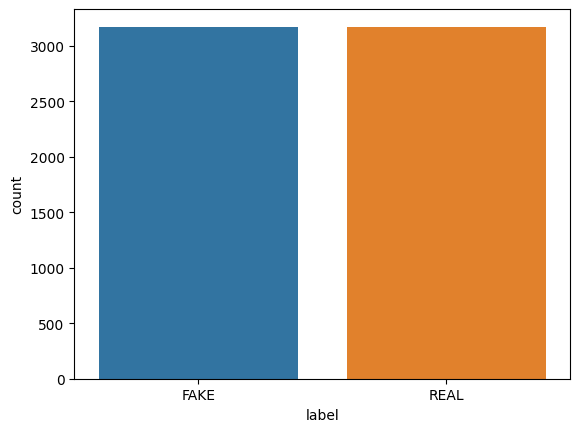

In [118]:
sns.countplot(df1,x="label")

In [119]:
x=df1['text']
y=df1['label'].replace({'FAKE':1,'REAL':0})

In [120]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [121]:
y

0       1
1       1
2       0
3       1
4       0
       ..
6330    0
6331    1
6332    1
6333    0
6334    0
Name: label, Length: 6335, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [124]:
count_vectorizer=CountVectorizer()
tfidf_vectorizer=TfidfVectorizer()

x_train_count=count_vectorizer.fit_transform(x_train)
x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)

x_test_count=count_vectorizer.fit_transform(x_test)
x_test_tfidf=tfidf_vectorizer.fit_transform(x_test)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


x_train_count = count_vectorizer.fit_transform(x_train)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)


x_test_count = count_vectorizer.transform(x_test)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

In [126]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()

model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [127]:

predictions = model.predict(x_test_tfidf)


from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(f'Accuracy: {accuracy}\n{report}')

Accuracy: 0.8208366219415943
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       664
           1       0.98      0.64      0.77       603

    accuracy                           0.82      1267
   macro avg       0.86      0.81      0.81      1267
weighted avg       0.86      0.82      0.81      1267

